In [1]:
from stravalib import Client

client_id = '33024' 
client = Client()

url = client.authorization_url(
    client_id=client_id,
    redirect_uri='http://localhost/'
)

print(url)


https://www.strava.com/oauth/authorize?client_id=33024&redirect_uri=http%3A%2F%2Flocalhost%2F&approval_prompt=auto&response_type=code&scope=read%2Cactivity%3Aread


In [2]:
code = '6caab15233c4f9fcd13071de269d163ea88bbaa7' # Change this to what you see
client_secret="18c6b793c2eb0152ce85fa2bb3f7d706165d396f"

access_token = client.exchange_code_for_token(
    client_id=client_id,
    client_secret=client_secret,
    code=code
)
refresh_token = access_token['access_token']
client = Client(access_token=refresh_token)

In [3]:
## Download the activities 
import pandas as pd
from stravalib import unithelper
run_df = pd.DataFrame(columns=['date', 'id', 'moving_time', 'distance', 'heart_rate'])

for activity in client.get_activities(after = "2019-01-01T00:00:00Z",  limit=500):
    if activity.type == 'Run' and activity.has_heartrate:
        run_df = run_df.append(
            {
                'date': activity.start_date_local.date(),
                 'id': activity.id, 
                 'moving_time': activity.moving_time, 
                 'distance': activity.distance,
                 'heart_rate': activity.average_heartrate
            }, 
            ignore_index=True
        )
        
run_df['minutes']=run_df['moving_time'].transform(lambda x: x.total_seconds()/60)

run_df['miles']=run_df['distance'].transform(lambda x: float(unithelper.miles(x)))

run_df['speed']=run_df['miles']*1609/run_df['minutes']

run_df = run_df[(run_df.speed > 100) & (run_df.speed <250)]


[Text(0, 0.5, 'Heart Rate (beats/minute)'),
 Text(0.5, 0, 'Running Speed (meters/minute)')]

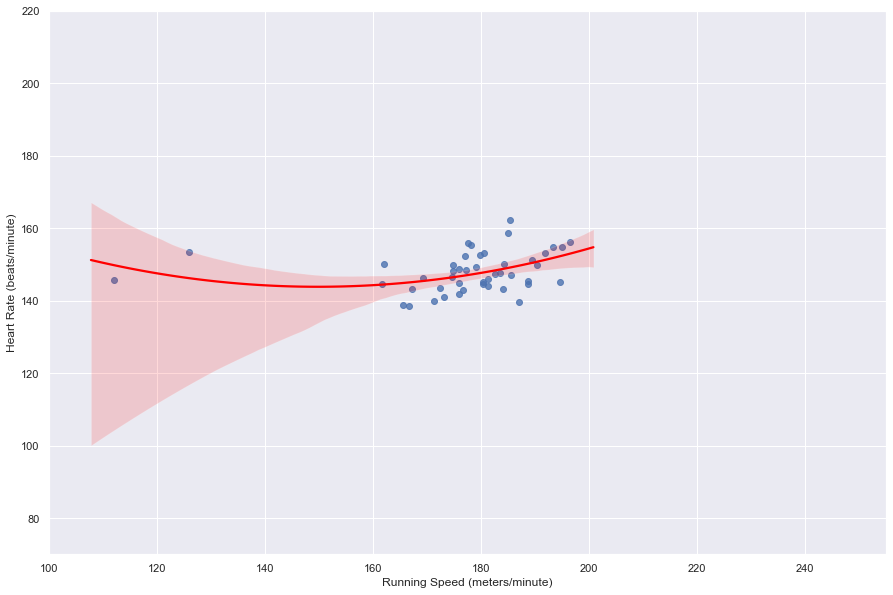

In [4]:
## Plot Figure 3. 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(15, 10))

ax = sns.regplot(x="speed", y="heart_rate", data=run_df, order=2, ci=95, line_kws={"color": "red"})

ax.set_ylim([70, 220])

ax.set_xlim([100, 255])

ax.set(xlabel='Running Speed (meters/minute)', ylabel='Heart Rate (beats/minute)')